In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Загрузка данных
data_train = pd.read_csv("train.csv")

X = data_train.iloc[:-1][['Robot_X', 'Robot_Y', 'Robot_Angle', 'Ball_X', 'Ball_Y']]
y = data_train.iloc[1:][['Robot_X', 'Robot_Y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Напишем сами классический алгоритм линейной регрессии:

In [32]:

import numpy as np

class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Добавляем столбец единиц к матрице признаков для учета свободного коэффициента (intercept)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Решаем уравнение коэффициентов: (X^T * X)^(-1) * X^T * y
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

        # Первый элемент theta - intercept, остальные - коэффициенты при признаках
        self.intercept_ = self.theta[0]
        self.coef_ = self.theta[1:]

    def predict(self, X):
        # Добавляем столбец единиц к матрице признаков для учета свободного коэффициента (intercept)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Предсказываем значения y: y = X * theta
        y_pred = X.dot(self.theta)
        return y_pred

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error


# Оценка среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.18481234462187715


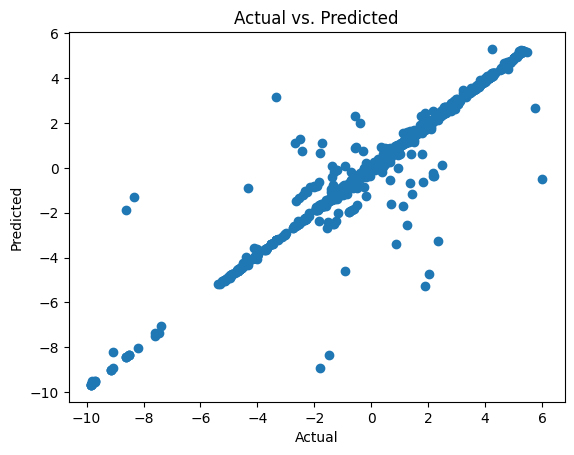

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()


График рассеяния (Scatter Plot).В идеальном случае все точки лежат на прямой y=x.

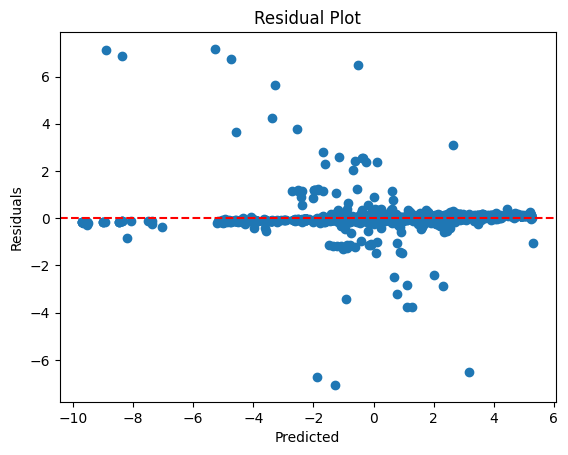

In [34]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


График остатков (Residual Plot): Этот график показывает разницу между фактическими и предсказанными значениями. Если модель хорошо соответствует данным, остатки должны быть распределены случайно вокруг нуля без какого-либо определенного тренда.